<a href="https://colab.research.google.com/github/younghoonNa/pythonDT/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_7%EC%9D%BC%EC%B0%A8_%EC%9B%8C%ED%81%AC%EC%83%B5_%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 구조 및 유형
| Variable | Definition | Type |
|----------|------------|-----|
| longitude| Longitude	| Continuous |
| latitude | Latitude   | Continuous |
| housingmedianage | Median age of houses in area | Continuous |
| total_rooms | Avg No. of rooms of houses in area | Continuous |
| total_bedrooms | Avg No. of bedrooms of houses in area | Continuous |
| population | No. of people in area | Continuous |
| households | No. of households in area | Continuous |
| median_income | Median income of household | Continuous |
| medianhousevalue | Median value of houses in area | Continuous |
| ocean_proximity | Proximity to ocean	| Categorical |

In [1]:
!wget http://49.247.133.7/housing.csv

--2022-01-04 04:49:37--  http://49.247.133.7/housing.csv
Connecting to 49.247.133.7:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/csv]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  1.17MB/s    in 1.2s    

2022-01-04 04:49:38 (1.17 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [2]:
# 패키지 설치 (folium : 지도 시각화)
!pip install folium

In [321]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as folium
from folium import plugins
from folium.plugins import HeatMap
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore') # 경고창 무시

In [322]:
# housing.csv를 읽어 df에 저장하세요.
df = pd.read_csv('housing.csv')


In [323]:
# 데이터 프레임의 상위 20개를 조회하세요.
df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [324]:
# 데이터 프레임의 shape을 확인하세요.
df.shape

(20640, 10)

In [325]:
# 데이터 프레임의 정보를 확인하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [326]:
# 각 컬럼별 결측치의 개수를 조회하세요.
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [327]:
# 각 컬럼별 결측치의 비율를 조회하세요.
# 비율 = 결측치 / 전체 데이터
df.isna().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [274]:
# 결측치가 존재하는 행 정보를 확인하세요.
df.loc[df['total_bedrooms'].isna() == True, :]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


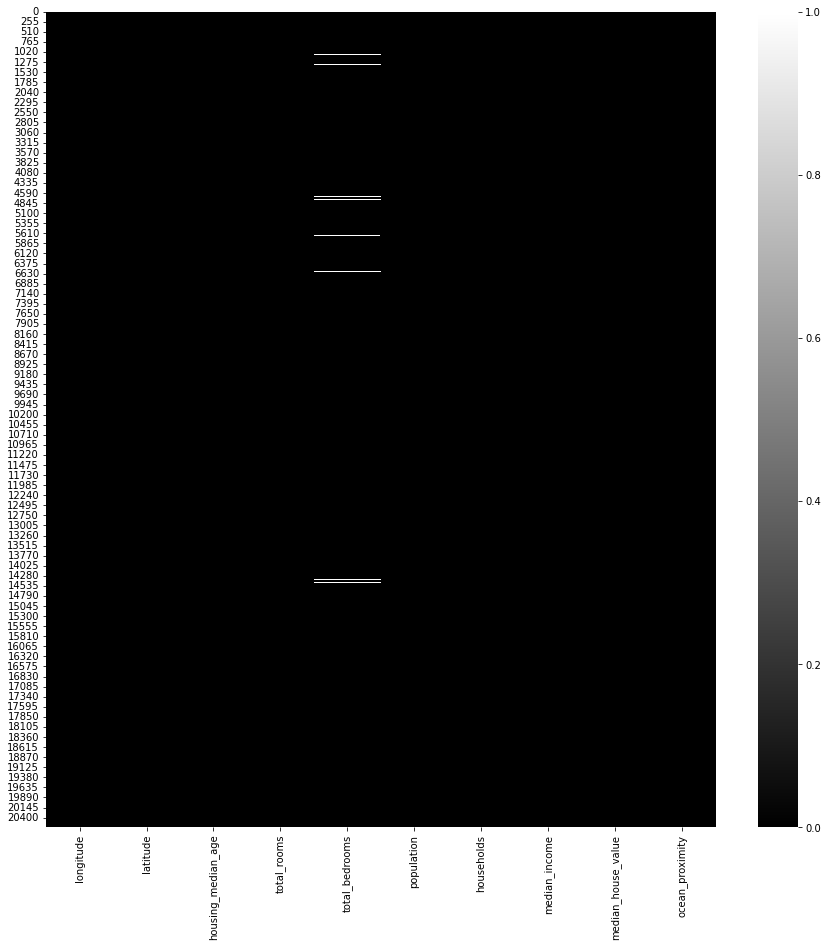

In [328]:
# 결측치 위치 시각화
plt.figure(figsize=(15,15))
sns.heatmap(df.isna(), cmap='gray')

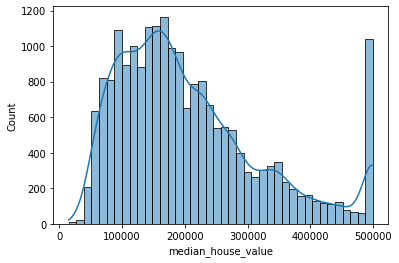

In [277]:
# sns.histplot 함수를 사용하여 median_house_value 컬럼을 시각화하세요.
# kde=True, bins=40를 적용하세요.|
sns.histplot(df['median_house_value'],kde=True, bins=40)

In [278]:
# median_house_value 컬럼의 통계적 요약 정보를 조회하세요.
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [279]:
# total_bedrooms의 중앙값으로 결측치를 대체하세요.
df.loc[df['total_bedrooms'].isna() ==True, 'total_bedrooms'] =df['total_bedrooms'].median()


In [280]:
# 결측치가 존재하는지 확인하세요.
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [281]:
# 각 컬럼별 고유값의 개수를 조회하세요 > nunique 함수 사용
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

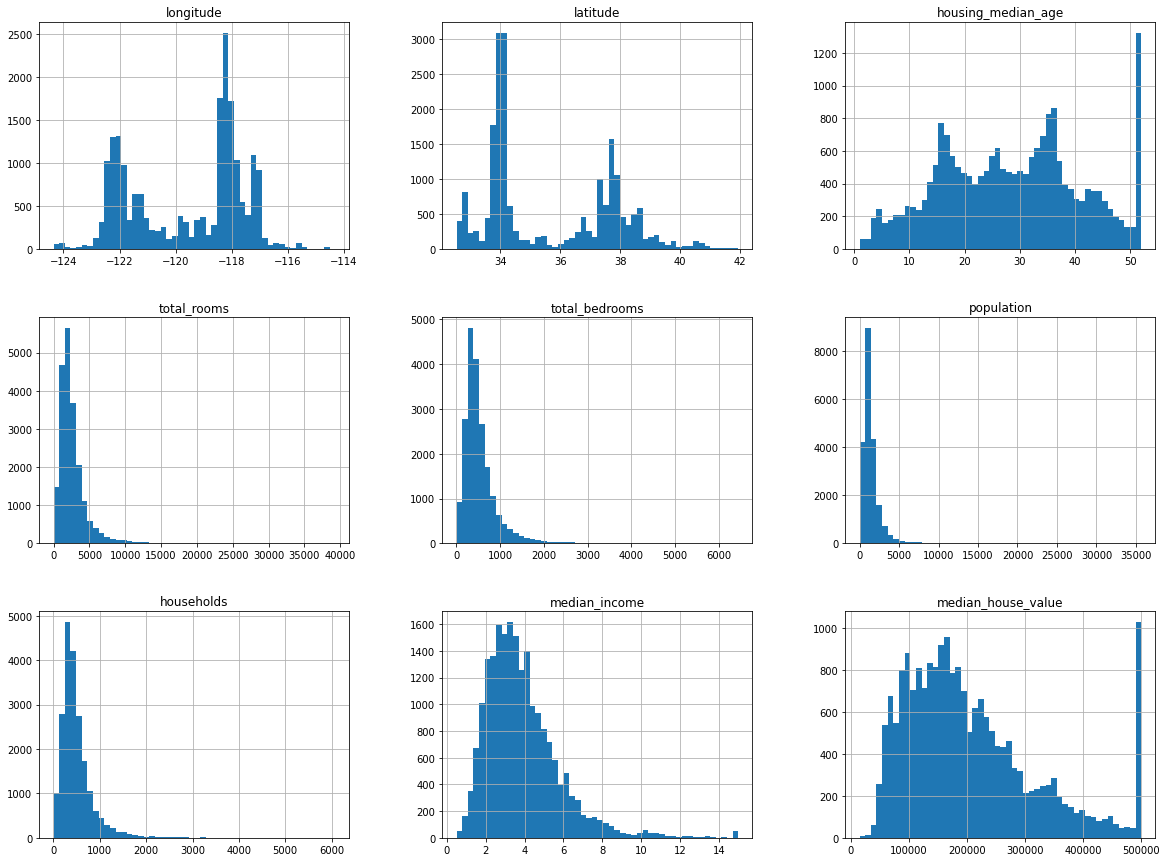

In [329]:
# 데이터 프레임의 hist 함수를 사용하여 각 컬럼별 분포를 확인하세요.
# bins=50, figsize=(20,15)를 적용하세요.

df.hist(bins=50, figsize=(20,15))
plt.show()

# df_list = df.columns[:-1]
# df_list

# k=1
# plt.figure(figsize=(20,15))
# for i in df_list:

#   plt.subplot(3,3,k)
#   plt.hist(df[i],bins=50)
#   k+=1

In [283]:
# continuous 변수와 categorical 변수를 생성하세요.
  # continuous : continuous type의 컬럼명이 담긴 리스트
  # categorical : categorical type의 컬럼명이 담긴 리스트
continuous = df.columns[:-1]
categorical = df.columns[-1]

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [285]:
# 범주형 컬럼인 ocean_proximity의 범주별 개수를 계산하세요.
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [286]:
# 범주형 컬럼인 ocean_proximity의 범주별 비율을 계산하세요.
df['ocean_proximity'].value_counts(normalize = True)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

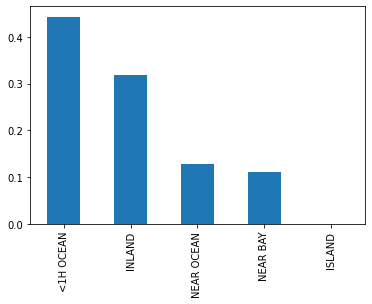

In [287]:
# 해당 결과를 bar plot으로 시각화 해보세요.
df['ocean_proximity'].value_counts(normalize = True).plot(kind = 'bar')

In [288]:
# ocean_proximity 컬럼의 <1H OCEAN 값을 1H OCEAN으로 수정하세요
# < 기호를 제거합니다.
df.loc[df['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = '1H OCEAN'
df['ocean_proximity'].value_counts()

1H OCEAN      9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [289]:
# 범주형 컬럼인 ocean_proximity의 범주별 비율을 재계산하세요.
df['ocean_proximity'].value_counts(normalize = True)

1H OCEAN      0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3306539a10>,
      dtype=object)

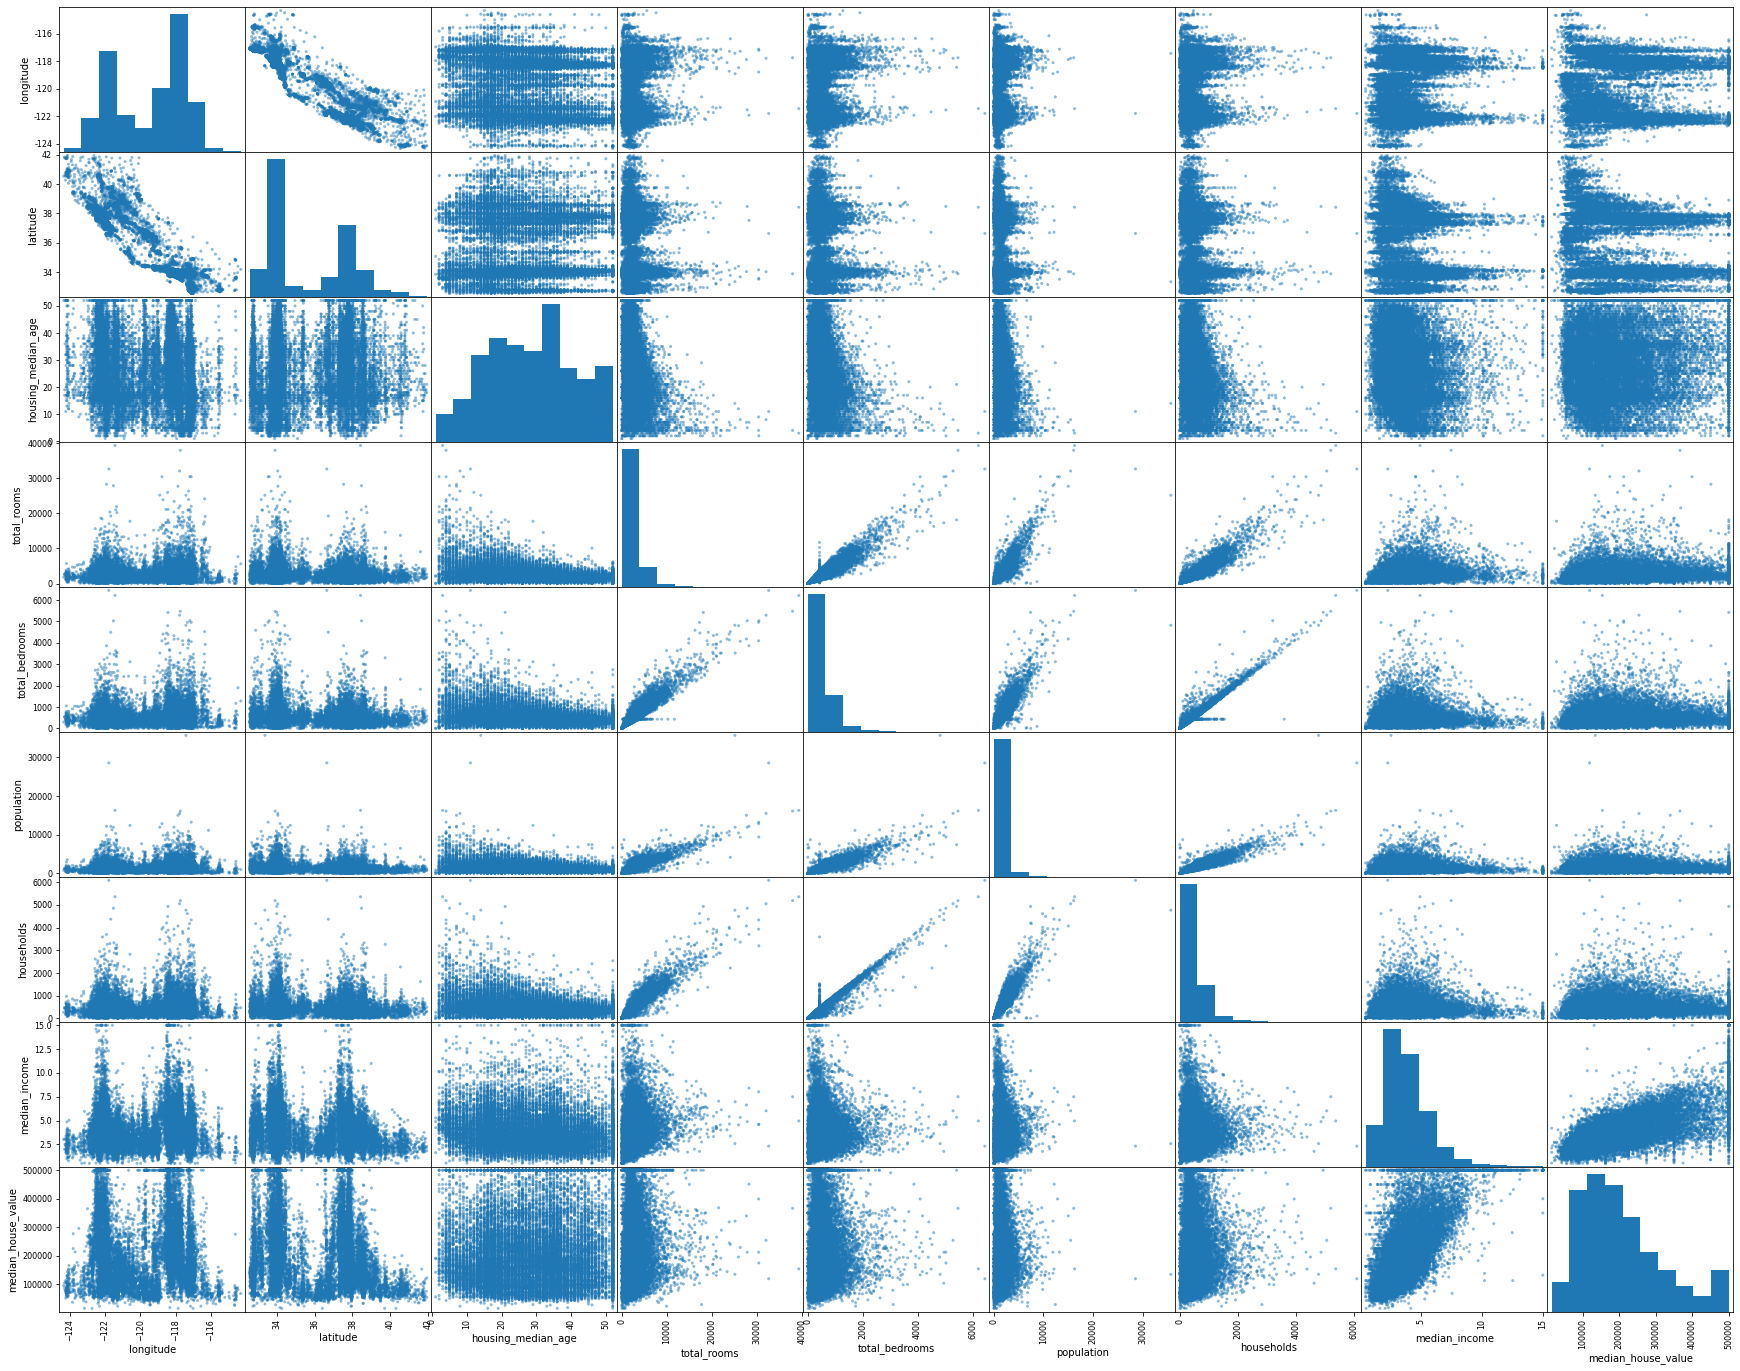

In [290]:
# scatter_matrix를 이용하여 컬럼과 컬럼의 관계와 컬럼의 밀도를 확인합니다.
from pandas.plotting import scatter_matrix
scatter_matrix(df[continuous], figsize=(30,24))

In [291]:
# folium을 이용하여 실제 지도에 시각화를 진행합니다.
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(california_map)
california_map

# 색상이 붉은색에 가까울수록 데이터가 많이 존재합니다.

In [292]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [293]:
# 데이터 프레임에서 longitude와 latitude 컬럼을 추출하여 X에 median_house_value 컬럼을 추출하여 Y에 저장하세요.
X = df.loc[:,['longitude','latitude']]
X

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


In [294]:
Y = pd.DataFrame(df['median_house_value'])
Y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [295]:
# DecisionTreeRegressor를 이용하여 X와 Y를 학습하세요.
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=23).fit(X, Y)

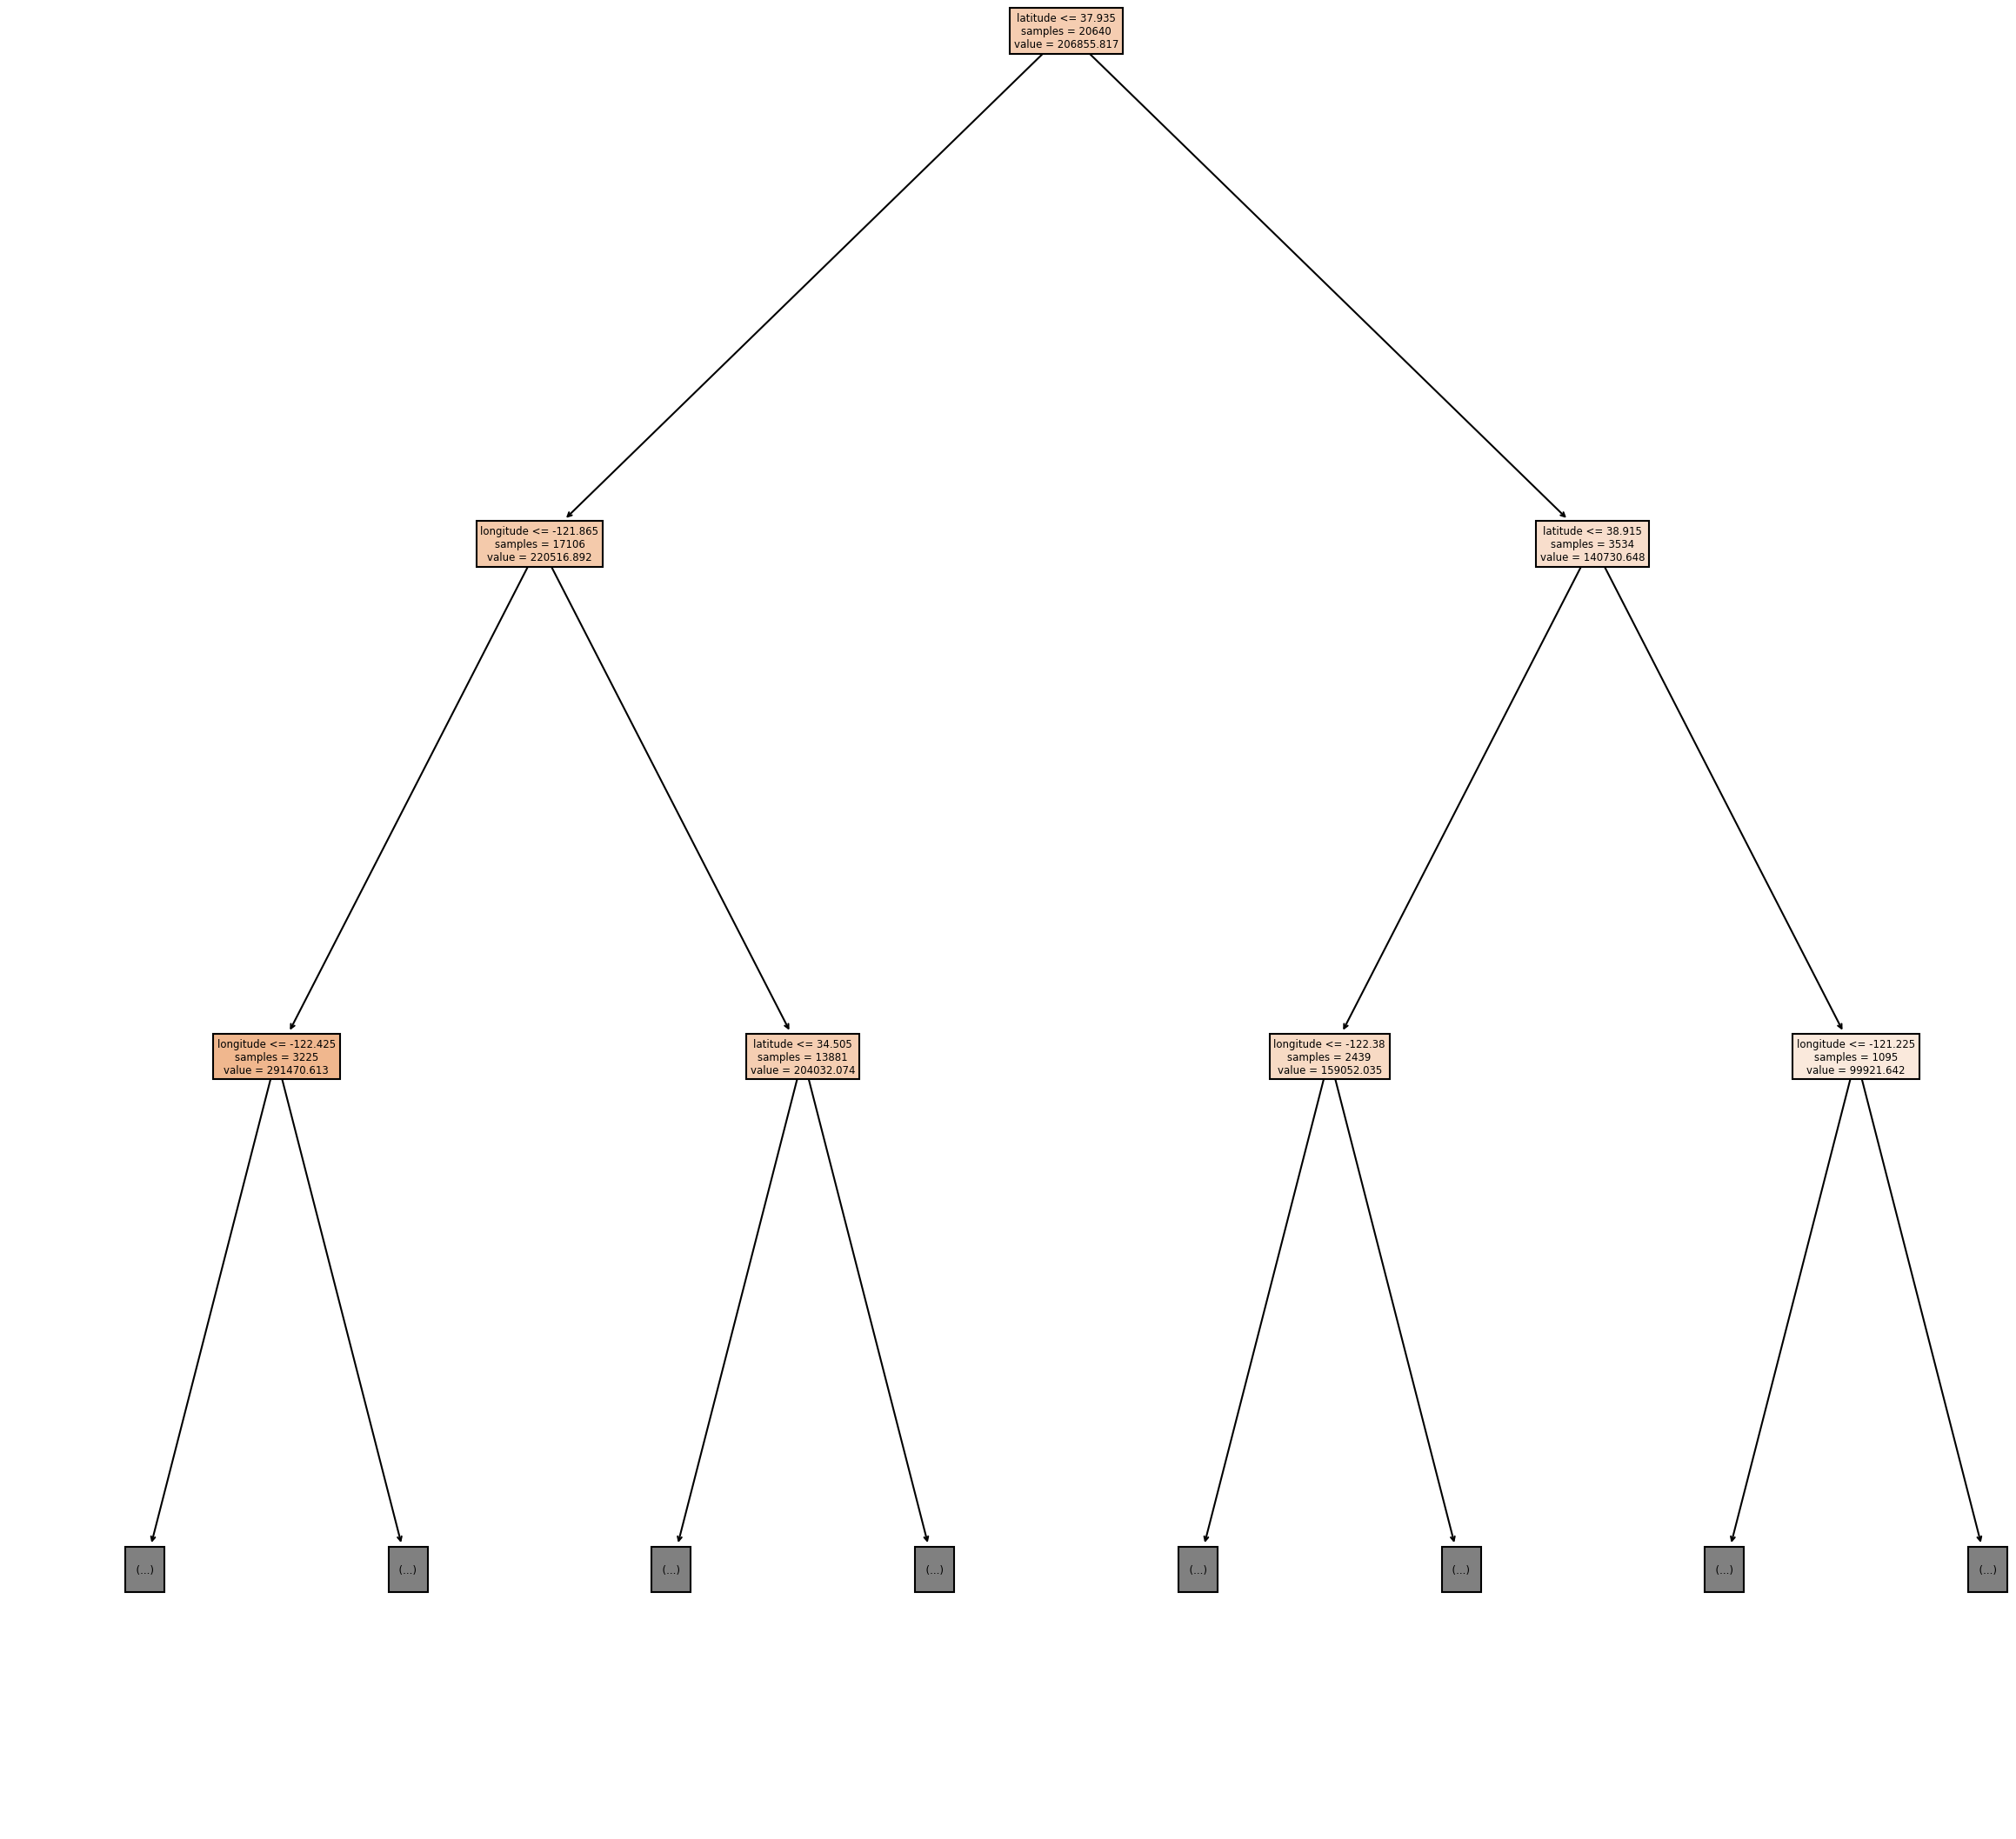

In [296]:
# plot_tree 함수를 이용하여 그래프를 시각화합니다.
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10), dpi=150)
plot_tree(model, max_depth=2,feature_names=X.columns, impurity=False, filled=True)
plt.show()

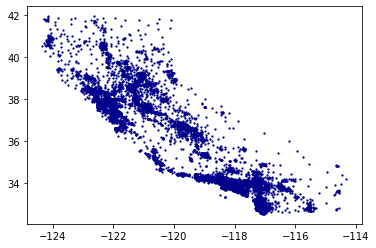

In [297]:
# longitude 컬럼을 x latitude 컬럼을 y로 하는 scatter plot을 그리세요.
# 색상(c)은 DarkBlue를 점의 크기(s)는 1.5로 지정하세요.
plt.scatter(x=X['longitude'], y=X['latitude'], c='DarkBlue', s=1.5)

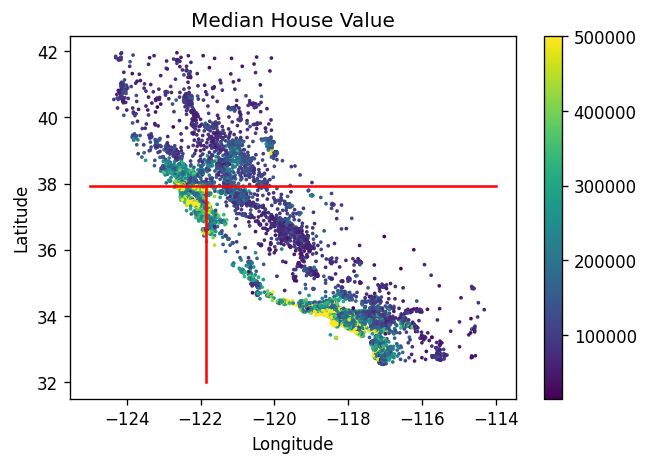

In [330]:
# 집값 측면에서 "위치"가 얼마나 영향이 있는지 확인
plt.figure(figsize=[6,4], dpi=120)
plt.scatter(x=df["longitude"],y=df["latitude"],c=df["median_house_value"], s=1.5)
splits = model.tree_.threshold[:2]
plt.plot([-125,-114],[splits[0],splits[0]], c='red')
plt.plot([splits[1],splits[1]],[32,splits[0]], c='red')
# plt.ylim(32,42)
# plt.xlim(-125,-114)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Median House Value")
plt.colorbar()
plt.show()# 집값 측면에서 "위치"가 얼마나 영향이 있는지 확인


In [299]:
# x와 y를 train과 test로 분할하세요.
# random_state는 0을 적용합니다.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split(X,Y, random_state=0, test_size=0.2)

In [300]:
# 랜덤 포레스트 모델을 이용하여 데이터를 학습하고 평가합니다.
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state =23).fit(x_train, y_train)
model_rf.score(x_train, y_train), model_rf.score(x_test, y_test)

(0.9400328371594248, 0.7944138112181681)

In [301]:
rf_pred = model_rf.predict(x_test)

In [302]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
print('MAE:', mean_absolute_error(rf_pred, y_test))
print('MSE:',mean_squared_error(rf_pred, y_test))
print('MKSE:', sqrt(mean_squared_error(rf_pred, y_test)))

MAE: 32243.65531393035
MSE: 2680751187.102809
MKSE: 51775.97113625981


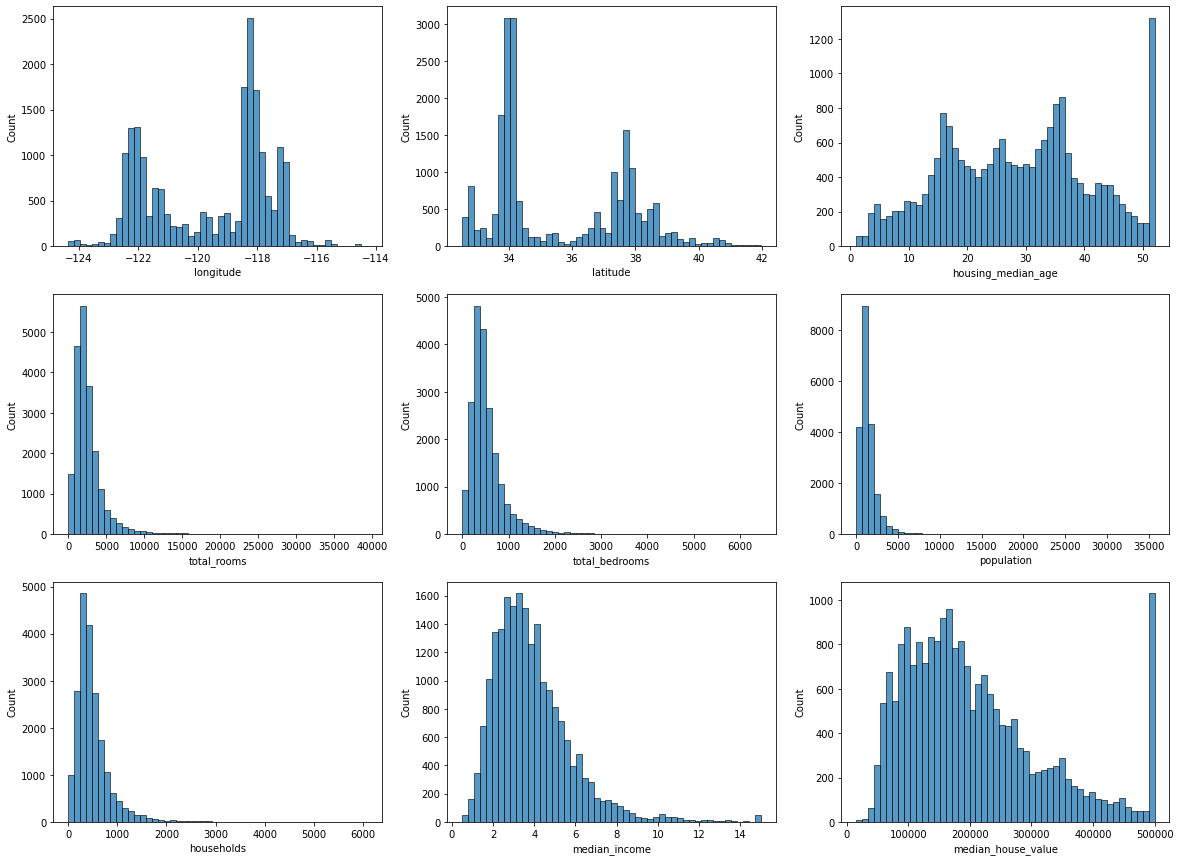

In [303]:
# subplot과 sns.histplot 함수를 이용하여 continuous컬럼의 분포를 확인하세요.
k=1
plt.figure(figsize=(20,15))
for i in continuous:

  plt.subplot(3,3,k)
  sns.histplot(df[i],bins=50)
  k+=1

In [304]:
# 아래 컬럼은 log 변환을 적용해주세요.
# total_rooms, total_bedrooms, population, households, median_income, median_house_value

df.loc[:, ['total_rooms', 'total_bedrooms']] =\
       np.log1p(df.loc[:, ['total_rooms', 'total_bedrooms']])

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.009409,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.291656,5.252273,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.150701,5.463832,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.395108,5.638355,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,6.548219,5.017280,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,7.720905,6.186209,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,7.528869,6.016157,741.0,349.0,1.8672,84700.0,INLAND


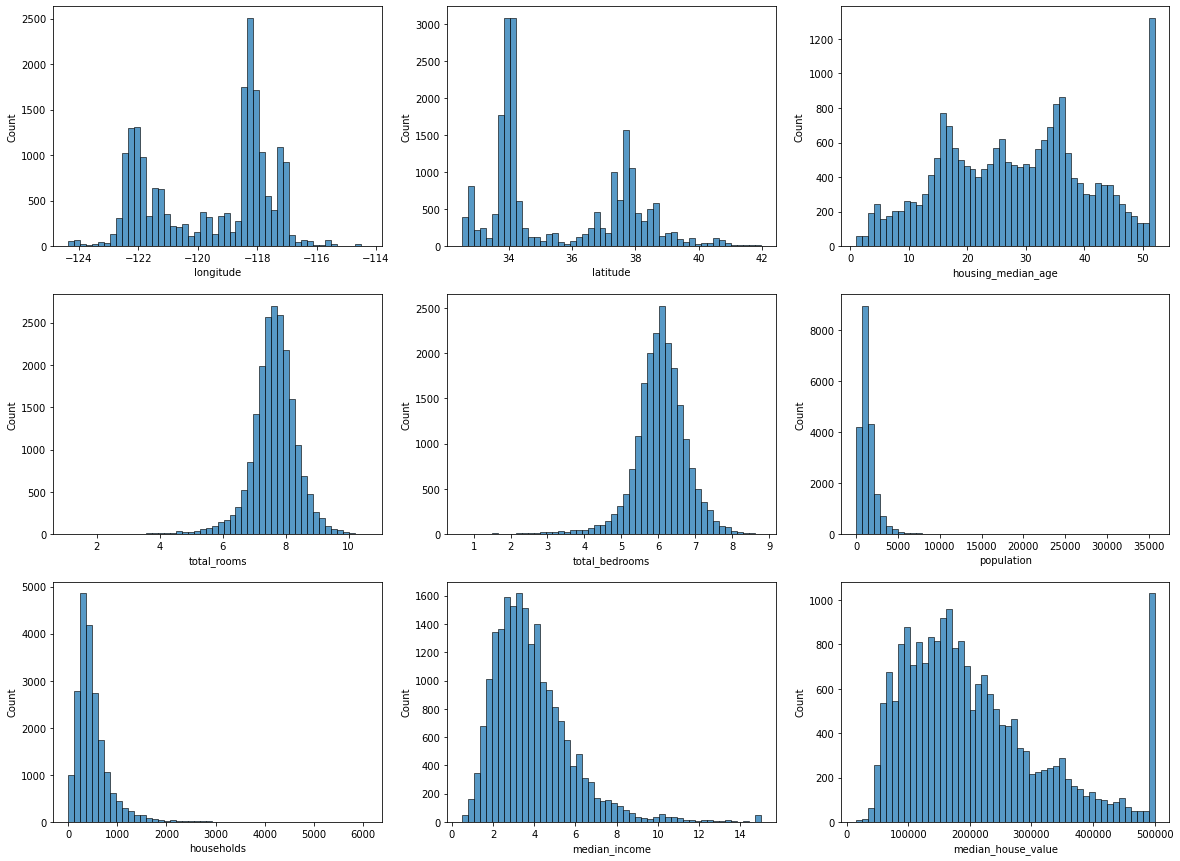

In [305]:
# subplot과 sns.histplot 함수를 이용하여 continuous컬럼의 분포를 재확인하세요.
k=1
plt.figure(figsize=(20,15))
for i in continuous:

  plt.subplot(3,3,k)
  sns.histplot(df[i],bins=50)
  k+=1

In [306]:
# continuous 컬럼만 추출하여 df_continuous에 저장하세요.
# copy함수를 사용하세요
df_continuous = df[continuous]
df_continuous

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,6.781058,4.867534,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,8.867850,7.009409,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,7.291656,5.252273,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,7.150701,5.463832,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,7.395108,5.638355,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,6.548219,5.017280,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,7.720905,6.186209,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,7.528869,6.016157,741.0,349.0,1.8672,84700.0


In [307]:
# df_continuous 데이터 프레임을 표준화하세요
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()
df_continuous = sclaer.fit_transform(df_continuous)
df_continuous

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [308]:
# 표준화된 결과를 df 데이터 프레임에 대입하세요.
df_continuous = pd.DataFrame(df_continuous, columns=continuous)

In [309]:
# get_dummies 함수를 이용하여 범주형 컬럼에 One Hot 변환을 적용하세요.
df_continuous['ocean_proximity'] = df['ocean_proximity']
df_continuous = pd.get_dummies(df_continuous)
df_continuous

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-1.131133,-1.642192,-0.974429,-0.977033,2.344766,2.129631,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,1.651357,1.320043,0.861439,1.669961,2.332238,1.314156,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.450310,-1.110094,-0.820777,-0.843637,1.782699,1.258693,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.638257,-0.817506,-0.766028,-0.733781,0.932968,1.165100,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.312370,-0.576140,-0.759847,-0.629157,-0.012881,1.172900,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.281605,-0.177042,-0.512592,-0.443449,-1.216128,-1.115804,0,1,0,0,0
20636,-0.818722,1.806329,-0.845393,-1.441596,-1.435092,-0.944405,-1.008420,-0.691593,-1.124470,0,1,0,0,0
20637,-0.823713,1.778237,-0.924851,0.122042,0.181548,-0.369537,-0.174042,-1.142593,-0.992746,0,1,0,0,0
20638,-0.873626,1.778237,-0.845393,-0.134015,-0.053635,-0.604429,-0.393753,-1.054583,-1.058608,0,1,0,0,0


In [315]:
# median_house_value 컬럼을 제외한 나머지를 X 변수에 저장해주세요
X = df_continuous.drop('median_house_value' , axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-1.131133,-1.642192,-0.974429,-0.977033,2.344766,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,1.651357,1.320043,0.861439,1.669961,2.332238,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.450310,-1.110094,-0.820777,-0.843637,1.782699,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.638257,-0.817506,-0.766028,-0.733781,0.932968,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.312370,-0.576140,-0.759847,-0.629157,-0.012881,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.281605,-0.177042,-0.512592,-0.443449,-1.216128,0,1,0,0,0
20636,-0.818722,1.806329,-0.845393,-1.441596,-1.435092,-0.944405,-1.008420,-0.691593,0,1,0,0,0
20637,-0.823713,1.778237,-0.924851,0.122042,0.181548,-0.369537,-0.174042,-1.142593,0,1,0,0,0
20638,-0.873626,1.778237,-0.845393,-0.134015,-0.053635,-0.604429,-0.393753,-1.054583,0,1,0,0,0


In [317]:
# median_house_value 컬럼을 Y 변수에 저장해주세요
Y = df_continuous['median_house_value']
Y

0        2.129631
1        1.314156
2        1.258693
3        1.165100
4        1.172900
           ...   
20635   -1.115804
20636   -1.124470
20637   -0.992746
20638   -1.058608
20639   -1.017878
Name: median_house_value, Length: 20640, dtype: float64

In [318]:
# x와 y를 train과 test로 분할하세요.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split(X,Y, random_state=0, test_size=0.2)


In [319]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [331]:
# KNeighborsRegressor 모델을 이용하여 학습하고 평가하세요.
model = KNeighborsRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8180097965951346, 0.7103891964037137)

In [333]:
# test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
p_test = model.predict(x_test)
print('MAE:', mean_absolute_error(p_test, y_test))
print('MSE:',mean_squared_error(p_test, y_test))
print('MKSE:', sqrt(mean_squared_error(p_test, y_test)))

MAE: 0.35854058137962447
MSE: 0.2836088333197013
MKSE: 0.5325493717203141


In [334]:
# LinearRegression 모델을 이용하여 학습하고 평가하세요.
model_lin = LinearRegression().fit(x_train, y_train)
model_lin.score(x_train, y_train), model_lin.score(x_test, y_test)

(0.6499223782796145, 0.642657265945989)

In [335]:
# test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
lin_pred_test = model_lin.predict(x_test)
print('MAE:', mean_absolute_error(lin_pred_test, y_test))
print('MSE:',mean_squared_error(lin_pred_test, y_test))
print('MKSE:', sqrt(mean_squared_error(lin_pred_test, y_test)))

MAE: 0.4276385709470005
MSE: 0.34993706948033854
MKSE: 0.5915547899225722


In [341]:
# Ridge 모델을 이용하여 학습하고 평가하세요.
model_rid = Ridge().fit(x_train, y_train)
model_rid.score(x_train, y_train), model_rid.score(x_test, y_test)

(0.649905052500809, 0.6426339387355637)

In [342]:
# test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rid_pred_test = model_rid.predict(x_test)
print('MAE:', mean_absolute_error(rid_pred_test, y_test))
print('MSE:',mean_squared_error(rid_pred_test, y_test))
print('MKSE:', sqrt(mean_squared_error(rid_pred_test, y_test)))

MAE: 0.4276599970939273
MSE: 0.34995991325153486
MKSE: 0.5915740978537979


In [343]:
# Lasso 모델을 이용하여 학습하고 평가하세요.
model_la = Lasso().fit(x_train, y_train)
model_la.score(x_train, y_train), model_la.score(x_test, y_test)


(0.0, -0.00029774466534027155)

In [344]:
# test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
las_pred_test = model_la.predict(x_test)
print('MAE:', mean_absolute_error(las_pred_test, y_test))
print('MSE:',mean_squared_error(las_pred_test, y_test))
print('MKSE:', sqrt(mean_squared_error(las_pred_test, y_test)))

MAE: 0.7861247618195145
MSE: 0.9795673117648275
MKSE: 0.9897309289725301


In [345]:
# DecisionTreeRegressor 모델을 이용하여 학습하고 평가하세요.
model_dt = DecisionTreeRegressor().fit(x_train, y_train)
model_dt.score(x_train, y_train), model_dt.score(x_test, y_test)


(1.0, 0.625028885276882)

In [346]:
# test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
dt_pred_test = model_dt.predict(x_test)
print('MAE:', mean_absolute_error(dt_pred_test, y_test))
print('MSE:',mean_squared_error(dt_pred_test, y_test))
print('MKSE:', sqrt(mean_squared_error(dt_pred_test, y_test)))

MAE: 0.3785362965287434
MSE: 0.3672001149634427
MKSE: 0.6059703911606925


In [347]:
# RandomForestRegressor 모델을 이용하여 학습하고 평가하세요.
model_rf = RandomForestRegressor().fit(x_train, y_train)
model_rf.score(x_train, y_train), model_rf.score(x_test, y_test)


(0.9751566734991143, 0.822688989484951)

In [348]:
# test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rf_pred_test = model_rf.predict(x_test)
print('MAE:', mean_absolute_error(rf_pred_test, y_test))
print('MSE:',mean_squared_error(rf_pred_test, y_test))
print('MKSE:', sqrt(mean_squared_error(rf_pred_test, y_test)))

MAE: 0.2741696804272598
MSE: 0.17363637061347242
MKSE: 0.41669697696704305


In [349]:
# GradientBoostingRegressor 모델을 이용하여 학습하고 평가하세요.
model_gb = GradientBoostingRegressor().fit(x_train, y_train)
model_gb.score(x_train, y_train), model_gb.score(x_test, y_test)


(0.7893921067585317, 0.7700224747067241)

In [350]:
# test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
gb_pred_test = model_gb.predict(x_test)
print('MAE:', mean_absolute_error(gb_pred_test, y_test))
print('MSE:',mean_squared_error(gb_pred_test, y_test))
print('MKSE:', sqrt(mean_squared_error(gb_pred_test, y_test)))

MAE: 0.3301858131382731
MSE: 0.2252114107217457
MKSE: 0.47456444317052


In [351]:
# XGBRegressor 모델을 이용하여 학습하고 평가하세요.
model_xgb = XGBRegressor().fit(x_train, y_train)
model_xgb.score(x_train, y_train), model_xgb.score(x_test, y_test)


[08:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.7869097307726325, 0.766921627251961)

In [353]:
# test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
xgb_pred_test = model_xgb.predict(x_test)
print('MAE:', mean_absolute_error(xgb_pred_test, y_test))
print('MSE:',mean_squared_error(xgb_pred_test, y_test))
print('MKSE:', sqrt(mean_squared_error(xgb_pred_test, y_test)))

MAE: 0.3325001028441674
MSE: 0.228247995400312
MKSE: 0.4777530694828783


In [354]:
# LGBMRegressor 모델을 이용하여 학습하고 평가하세요.
model_LGBM = LGBMRegressor().fit(x_train, y_train)
model_LGBM.score(x_train, y_train), model_LGBM.score(x_test, y_test)


(0.8738078766938554, 0.83206505578347)

In [355]:
# test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
LGBM_pred_test = model_LGBM.predict(x_test)
print('MAE:', mean_absolute_error(LGBM_pred_test, y_test))
print('MSE:',mean_squared_error(LGBM_pred_test, y_test))
print('MKSE:', sqrt(mean_squared_error(LGBM_pred_test, y_test)))

MAE: 0.27379338761529365
MSE: 0.16445461637284695
MKSE: 0.40553004373640056
